In [ ]:
#ICPR 数据集读图

In [1]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import errno

In [2]:
VERBOSE = 1

In [3]:
def read_img(path,data_name,split='train_image'):
    path = os.path.join(path,split,data_name+'.jpg')
    img = cv2.imread(path, cv2.IMREAD_COLOR) #cv读图更快一些，但是是bgr排布
    if img is None:
        raise OSError(errno.ENOENT, "No such file", path)
    img = img.astype(np.float32)
    img,scale = preprocess(img)
    return img,scale

def show_img(img,loc_box):
    #img : 输入图像数据
    #loc_box : box位置信息，（n，8）的矩阵，4对应四个参数为（左上点x，左上y，右下x，右下y）
    img = img.astype(np.uint8)
    plt.imshow(img)
    show_color ="red" 
    for i,bb in enumerate(loc_box):
        x1 = float(bb[0])
        y1 = float(bb[1])
        x2 = float(bb[2])
        y2 = float(bb[3])
        x3 = float(bb[4])
        y3 = float(bb[5])
        x4 = float(bb[6])
        y4 = float(bb[7])
        plt.plot([x1,x2],[y1,y2],color=show_color,linewidth=1)
        plt.plot([x2,x3],[y2,y3],color=show_color,linewidth=1)
        plt.plot([x3,x4],[y3,y4],color=show_color,linewidth=1)
        plt.plot([x4,x1],[y4,y1],color=show_color,linewidth=1)
    plt.axis('off') # 不显示坐标轴
    plt.show()

def preprocess(img):
    img = img[...,::-1]#bgr to rgb
    h,w,d = img.shape
    min_size = 600
    max_size = 1000
    scale1 = min_size / min(h, w)
    scale2 = max_size / max(h, w)
    scale = min(scale1, scale2)
    if VERBOSE:
        print("img shape is ",img.shape)
        print("scale is",scale)
    img = cv2.resize(img, dsize=(int(w*scale), int(h*scale)), interpolation=cv2.INTER_AREA)
    if VERBOSE: print("after resize img shape is ",img.shape)
    #适配conv2d input参数[batch_size,h,w,channels]
    img = img[np.newaxis,:,:,:]
    return img,scale

def read_image_info(path,img_name):
    fr = open(path+'/train_txt/'+img_name+'.txt','r',encoding='UTF-8')
    info_txt =list()
    for line in fr.readlines():
        line = line.strip().split(',')
        info_txt.append(line)
    arr = np.array(info_txt)
    arr = np.delete(arr, 8, 1)
    return arr

def get_img_sample(path,data_name):
    img,scale = read_img(path,data_name)
    arr = read_image_info(path,data_name)
    return img,arr,scale

img shape is  (600, 800, 3)
scale is 1.0
after resize img shape is  (600, 800, 3)


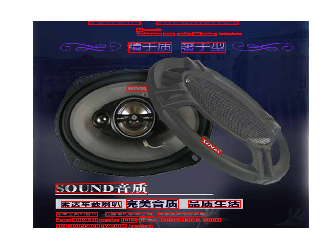

(1, 600, 800, 3)


In [6]:
path = 'data/ICPR'
data_name = 'TB1.5puLXXXXXXaaXXXunYpLFXX'
fr = open('data/ICPR/train_txt/'+data_name+'.txt','r',encoding='UTF-8')
info_txt =list()
for line in fr.readlines():
    line = line.strip().split(',')
    info_txt.append(line)
arr = np.array(info_txt)
arr = np.delete(arr, 8, 1)
img,scale = read_img(path,data_name)
show_img(img[0],arr)
print(img.shape)

img shape is  (600, 800, 3)
scale is 1.0
after resize img shape is  (600, 800, 3)


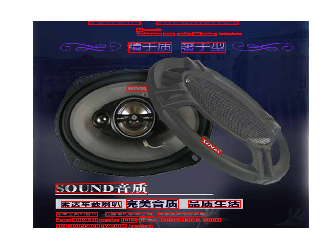

In [18]:
path = 'data/ICPR'
data_name = 'TB1.5puLXXXXXXaaXXXunYpLFXX'
img,scale = read_img(path,data_name)
arr = read_image_info(path,data_name)
show_img(img[0],arr)

In [7]:
a = np.arange(24).reshape(1,2,3,4)
b = tf.constant(a)
c = tf.reshape(a,[12,2])
print('a',a)
with tf.Session() as sess:
    print(sess.run(c))

a [[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]]

  [[12 13 14 15]
   [16 17 18 19]
   [20 21 22 23]]]]
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
